

### Recurrent Neural Networks (RNNs) are a type of neural network architecture that is particularly well-suited for tasks involving sequential data. Unlike feedforward neural networks, which process data in fixed-size chunks, RNNs can handle input sequences of arbitrary length.

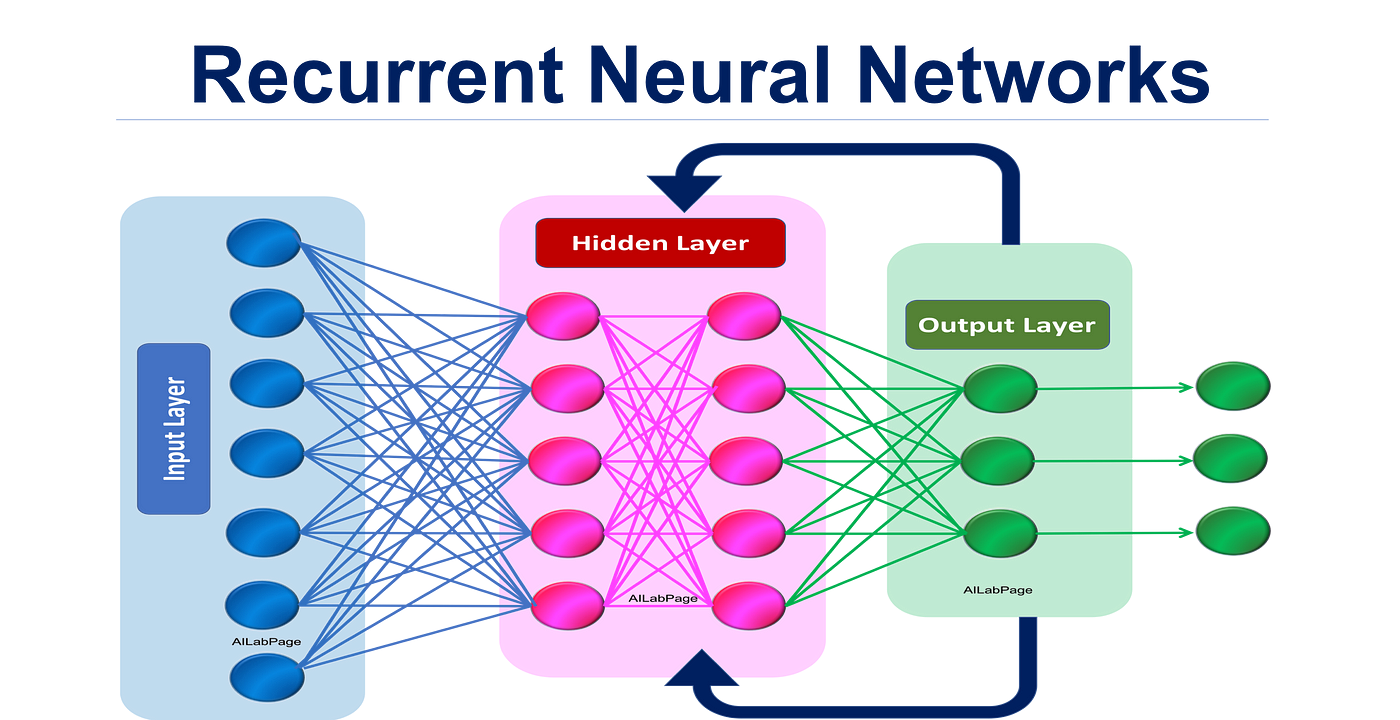

#### key features of RNNs:

- Recurrent Connections: RNNs have recurrent connections that allow information to persist across different time steps in a sequence. This means that information from previous inputs is considered when processing the current input.

- Shared Parameters: The same set of weights and biases are applied at each time step. This allows the network to use the same computation for different elements of the sequence.

- Time Dependency: RNNs are well-suited for tasks where the order or temporal dependency of data matters, such as time series prediction, language modeling, and speech recognition.

### The SimpleRNN layer processes sequences by iterating through the input sequence elements and maintaining a hidden state that captures information about the previous elements in the sequence.
The RNN in the provided example consists of one layer of SimpleRNN (Recurrent Neural Network) followed by a Dense layer for classification.
## The input to the RNN is a sequence of 28x28 pixels for each image in the MNIST dataset.

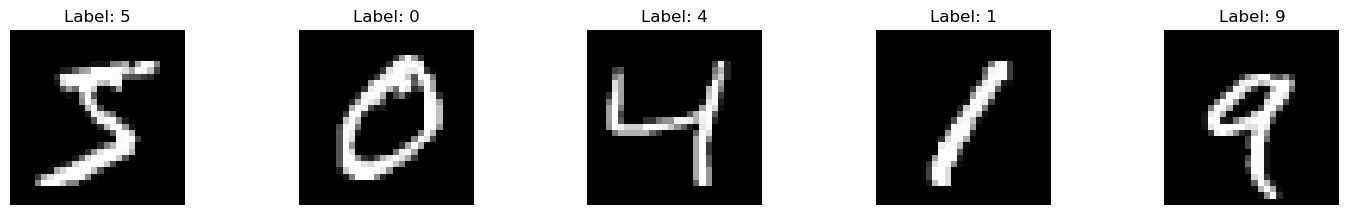

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print a few examples from the dataset
plt.figure(figsize=(18, 5))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

In [2]:
# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

- In model we are setting up a SimpleRNN layer with 32 units and an input shape of (28, 28), where 28 is the number of time steps (pixels along one axis), and 28 is the number of features at each time step (pixels along the other axis)
- After the SimpleRNN layer, a Dense layer is added for the final classification. The Dense layer uses a softmax activation function for multi-class classification.
- We are adding a Dense layer with 10 units (one for each digit) and a softmax activation function for the final classification.

In [3]:
# Build the RNN model (0-9)
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(28, 28)))
model.add(Dense(units=10, activation='softmax'))

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### The model is trained using categorical crossentropy loss and the Adam optimizer. The training involves adjusting the weights to minimize the difference between the predicted output and the actual labels

In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Reshape the input data for RNN
train_images_rnn = train_images.reshape((60000, 28, 28))
test_images_rnn = test_images.reshape((10000, 28, 28))

# Train the model
history = model.fit(train_images_rnn, train_labels, epochs=10, batch_size=80, validation_split=0.2) 

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9675 - loss: 0.1143 - val_accuracy: 0.9602 - val_loss: 0.1554
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9676 - loss: 0.1108 - val_accuracy: 0.9600 - val_loss: 0.1528
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9678 - loss: 0.1113 - val_accuracy: 0.9635 - val_loss: 0.1376
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9711 - loss: 0.1020 - val_accuracy: 0.9612 - val_loss: 0.1495
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9686 - loss: 0.1094 - val_accuracy: 0.9587 - val_loss: 0.1555
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9683 - loss: 0.1093 - val_accuracy: 0.9594 - val_loss: 0.1602
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9695 - loss: 0.1082 - val_accuracy: 0.9449 - val_loss: 0.2071
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9675 - loss: 0.1126 - val_accuracy: 0.

In [13]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images_rnn, test_labels)
print('Test accuracy:', test_acc)

# Function to predict and visualize results on new images
def predict_and_visualize(model, images, labels):
    predictions = model.predict(images)
    num_images = len(images)

    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        plt.title(f"Predicted: {np.argmax(predictions[i])}\nTrue: {np.argmax(labels[i])}")
        plt.axis('off')

    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9509 - loss: 0.1702
Test accuracy: 0.9624000191688538


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


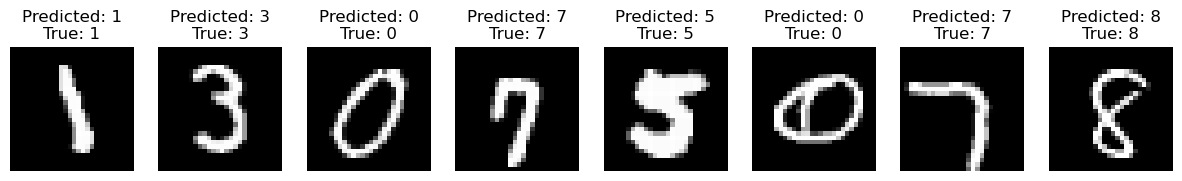

In [16]:
# Choose some random test images for prediction
num_images_to_predict = 8
random_indices = np.random.choice(len(test_images_rnn), num_images_to_predict, replace=False)
images_to_predict = test_images_rnn[random_indices]
labels_to_predict = test_labels[random_indices]

# Predict and visualize the results
predict_and_visualize(model, images_to_predict, labels_to_predict)
